In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0B1940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C479550>]], dtype=object)

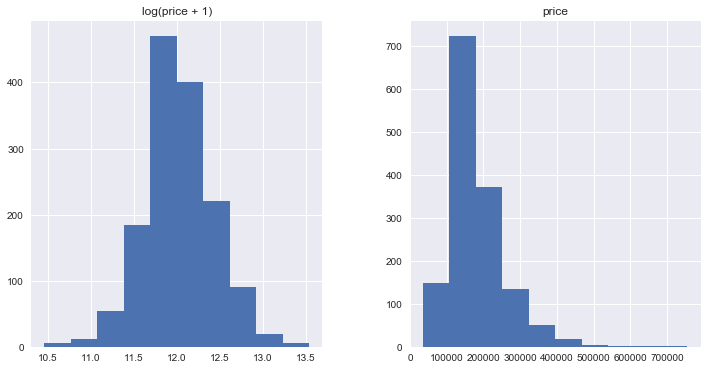

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [6]:
def check_id(X):
# Check for duplicates
    idsUnique = len(set(X.Id))
    idsTotal = X.shape[0]
    idsDupli = idsTotal - idsUnique
    print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")


In [7]:
check_id(train)

There are 0 duplicate IDs for 1460 total entries


In [8]:
check_id(test)

There are 0 duplicate IDs for 1459 total entries


In [9]:
# Drop Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# suppression des outliers

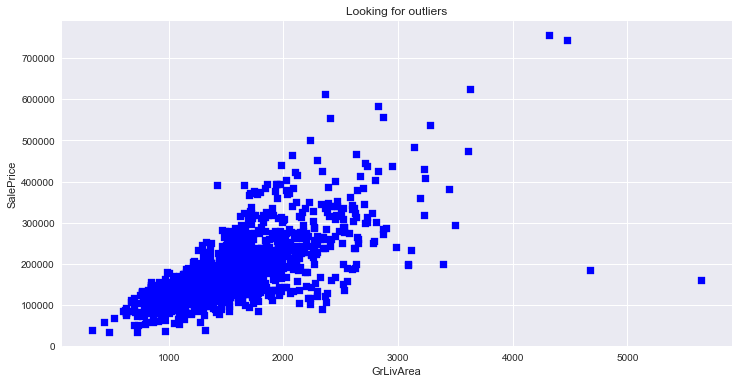

In [10]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

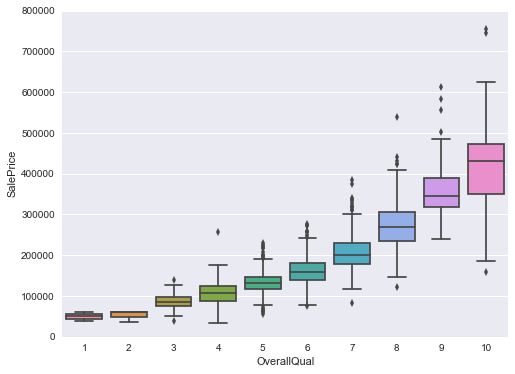

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

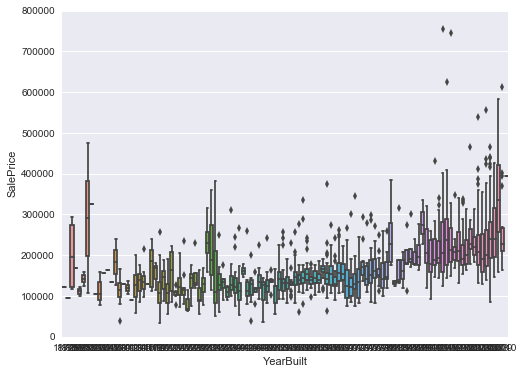

In [12]:
#box plot overallqual/saleprice
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

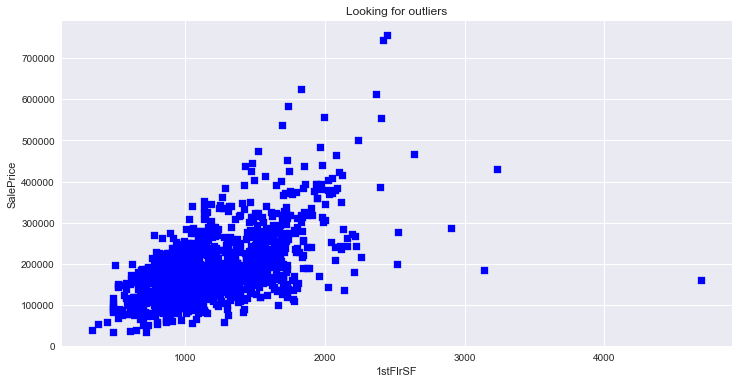

In [13]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train['1stFlrSF'], train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

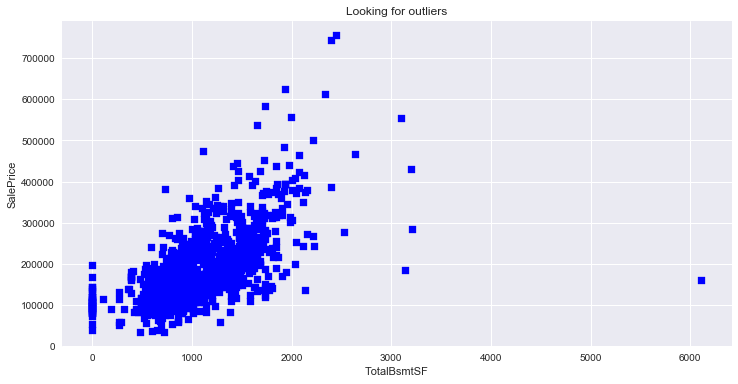

In [14]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train['TotalBsmtSF'], train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

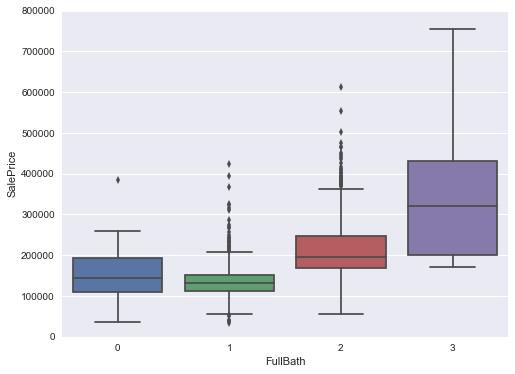

In [15]:
#box plot overallqual/saleprice
var = 'FullBath'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

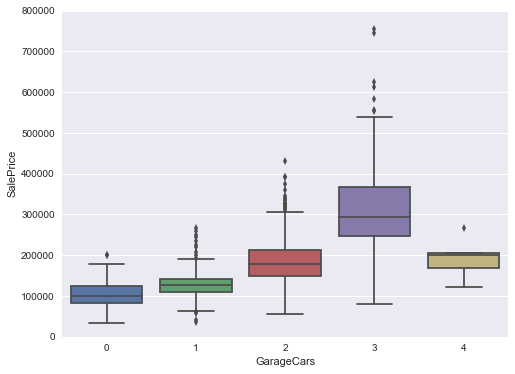

In [16]:
#box plot overallqual/saleprice
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

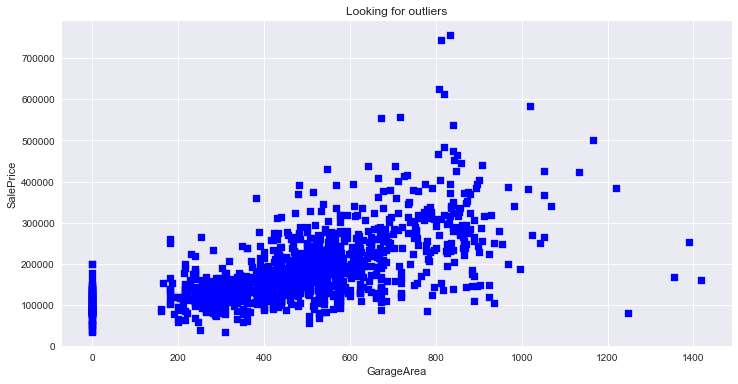

In [17]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train['GarageArea'], train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

In [18]:
train = train[train.GrLivArea < 4000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['TotalBsmtSF'] < 2500]
train = train[train['GarageArea'] < 1200]

In [19]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

# Nettoyage des données

In [20]:
newer_dwelling = all_data.MSSubClass.replace({20: 1, 
                                            30: 0, 
                                            40: 0, 
                                            45: 0,
                                            50: 0, 
                                            60: 1,
                                            70: 0,
                                            75: 0,
                                            80: 0,
                                            85: 0,
                                            90: 0,
                                           120: 1,
                                           150: 0,
                                           160: 0,
                                           180: 0,
                                           190: 0})
newer_dwelling.name = 'newer_dwelling'

In [21]:
#clean up data
# Some numerical features are actually really categories
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [22]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
all_data.loc[:, "Alley"] = all_data.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
all_data.loc[:, "BedroomAbvGr"] = all_data.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
all_data.loc[:, "BsmtQual"] = all_data.loc[:, "BsmtQual"].fillna("No")
all_data.loc[:, "BsmtCond"] = all_data.loc[:, "BsmtCond"].fillna("No")
all_data.loc[:, "BsmtExposure"] = all_data.loc[:, "BsmtExposure"].fillna("No")
all_data.loc[:, "BsmtFinType1"] = all_data.loc[:, "BsmtFinType1"].fillna("No")
all_data.loc[:, "BsmtFinType2"] = all_data.loc[:, "BsmtFinType2"].fillna("No")
all_data.loc[:, "BsmtFullBath"] = all_data.loc[:, "BsmtFullBath"].fillna(0)
all_data.loc[:, "BsmtHalfBath"] = all_data.loc[:, "BsmtHalfBath"].fillna(0)
all_data.loc[:, "BsmtUnfSF"] = all_data.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
all_data.loc[:, "CentralAir"] = all_data.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
all_data.loc[:, "Condition1"] = all_data.loc[:, "Condition1"].fillna("Norm")
all_data.loc[:, "Condition2"] = all_data.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
all_data.loc[:, "EnclosedPorch"] = all_data.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
all_data.loc[:, "ExterCond"] = all_data.loc[:, "ExterCond"].fillna("TA")
all_data.loc[:, "ExterQual"] = all_data.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
all_data.loc[:, "Fence"] = all_data.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
all_data.loc[:, "FireplaceQu"] = all_data.loc[:, "FireplaceQu"].fillna("No")
all_data.loc[:, "Fireplaces"] = all_data.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
all_data.loc[:, "Functional"] = all_data.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
all_data.loc[:, "GarageType"] = all_data.loc[:, "GarageType"].fillna("No")
all_data.loc[:, "GarageFinish"] = all_data.loc[:, "GarageFinish"].fillna("No")
all_data.loc[:, "GarageQual"] = all_data.loc[:, "GarageQual"].fillna("No")
all_data.loc[:, "GarageCond"] = all_data.loc[:, "GarageCond"].fillna("No")
# only one is null and it has type Detchd
all_data.loc[all_data['GarageArea'].isnull(), 'GarageArea'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageArea'].mean()
all_data.loc[all_data['GarageCars'].isnull(), 'GarageCars'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageCars'].median()
# HalfBath : NA most likely means no half baths above grade
all_data.loc[:, "HalfBath"] = all_data.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
all_data.loc[:, "HeatingQC"] = all_data.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
all_data.loc[:, "KitchenAbvGr"] = all_data.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
all_data.loc[:, "KitchenQual"] = all_data.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
#all_data.loc[:, "LotFrontage"] = all_data.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
all_data.loc[:, "LotShape"] = all_data.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
all_data.loc[:, "MasVnrType"] = all_data.loc[:, "MasVnrType"].fillna("None")
all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
all_data.loc[:, "MiscFeature"] = all_data.loc[:, "MiscFeature"].fillna("No")
all_data.loc[:, "MiscVal"] = all_data.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
all_data.loc[:, "OpenPorchSF"] = all_data.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
all_data.loc[:, "PavedDrive"] = all_data.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
all_data.loc[:, "PoolQC"] = all_data.loc[:, "PoolQC"].fillna("No")
all_data.loc[:, "PoolArea"] = all_data.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
all_data.loc[:, "SaleCondition"] = all_data.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
all_data.loc[:, "ScreenPorch"] = all_data.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
all_data.loc[:, "TotRmsAbvGrd"] = all_data.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
all_data.loc[:, "Utilities"] = all_data.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
all_data.loc[:, "WoodDeckSF"] = all_data.loc[:, "WoodDeckSF"].fillna(0)

#last missing value filled with most common value
all_data.loc[:,'Exterior1st'] = all_data.loc[:,'Exterior1st'].fillna("VinylSd")
all_data.loc[:,'Exterior2nd'] = all_data.loc[:,'Exterior2nd'].fillna("VinylSd")
all_data.loc[:,'Electrical'] = all_data.loc[:,'Electrical'].fillna("SBrkr")
all_data.loc[:,'SaleType'] = all_data.loc[:,'SaleType'].fillna("WD")
all_data.loc[:,'MSZoning'] = all_data.loc[:,'MSZoning'].fillna("RL")


In [23]:
# Encode some categorical features as ordered numbers when there is information in the order
all_data = all_data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [24]:
# I have no idea how to do it better. Probably, it is better to do nothing
x = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotArea"]
y = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotFrontage"]
# plt.scatter(x, y)
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t], 1)
all_data.loc[all_data['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, all_data.loc[all_data['LotFrontage'].isnull(), 'LotArea'])

In [25]:
year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))
all_data.GarageYrBlt = all_data.GarageYrBlt.map(year_map)
all_data.loc[all_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 'NoGarage'

In [26]:
def check_missing(X):
    missing = X.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()
    return missing

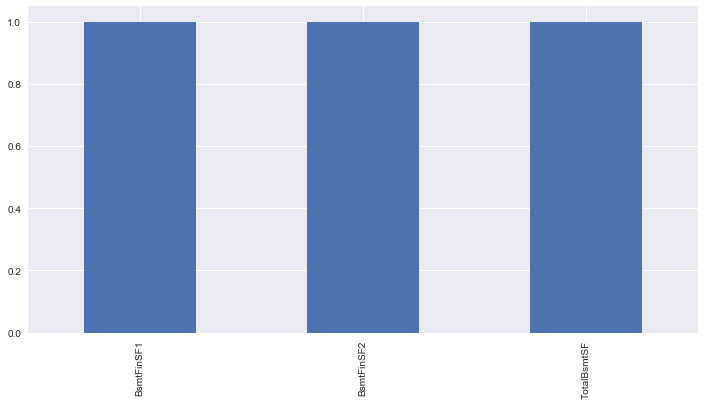

In [27]:
missing_data = check_missing(all_data)

In [28]:
quantitative = [f for f in all_data.columns if all_data.dtypes[f] != 'object']
qualitative = [f for f in all_data.columns if all_data.dtypes[f] == 'object']

In [29]:
for f in qualitative:
    if f in missing_data:
        print("qualitative data ",f," = ",missing_data[f])
for f in quantitative:
    if f in missing_data:
        print("quantitative data ",f," = ",missing_data[f])

quantitative data  BsmtFinSF1  =  1
quantitative data  BsmtFinSF2  =  1
quantitative data  TotalBsmtSF  =  1


In [30]:
#missing_qualitative = check_missing(all_data[qualitative])

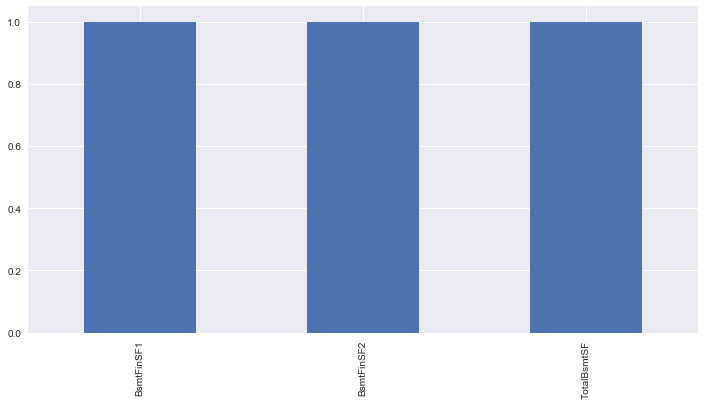

In [31]:
missing_quantitative = check_missing(all_data[quantitative])

In [32]:
# remplacement par la médiane des données numériques manquantes
for f in quantitative:
    avg = np.nanmedian(all_data[f])
    all_data[f].fillna(avg,inplace=True)
    if f in train.columns:
        train[f].fillna(avg,inplace=True)

In [33]:
#all_data['MSZoning'].value_counts().plot(kind='bar')

Cette facon d'encoder semble un peu mieux on va tester..

In [34]:
#all_data = pd.get_dummies(all_data)

In [35]:
#for f in all_data.columns:
#    print(f)

In [36]:
#all_data = all_data.drop('RoofMatl_ClyTile', axis=1) # only one is not zero
#all_data = all_data.drop('Condition2_PosN', axis=1) # only two is not zero
#all_data = all_data.drop('MSZoning_C (all)', axis=1)
#all_data = all_data.drop('MSSubClass_SC160', axis=1)
# this features definitely cause overfitting

Il nous reste des données manquantes. Il faut s'en occuper.

In [37]:
# on vérifie qu'on a plus de données manquantes
for f in all_data.columns:
    if all_data[f].isnull().sum()>0:
        print(f,all_data[f].isnull().sum())

# visualisation des données

In [38]:
#f = pd.melt(all_data,value_vars=quantitative)
#g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value")

In [39]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
#f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
#g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
#g = g.map(boxplot, "value", "SalePrice")

In [40]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#model = TSNE(n_components=2, random_state=0, perplexity=50)
#tsne = model.fit_transform(all_data)

#std = StandardScaler()
#s = std.fit_transform(all_data)
#pca = PCA(n_components=30)
#pca.fit(s)
#pc = pca.transform(s)
#kmeans = KMeans(n_clusters=5)
#kmeans.fit(pc)

#fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
#sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
#print(np.sum(pca.explained_variance_ratio_))

# test statistiques sur les données

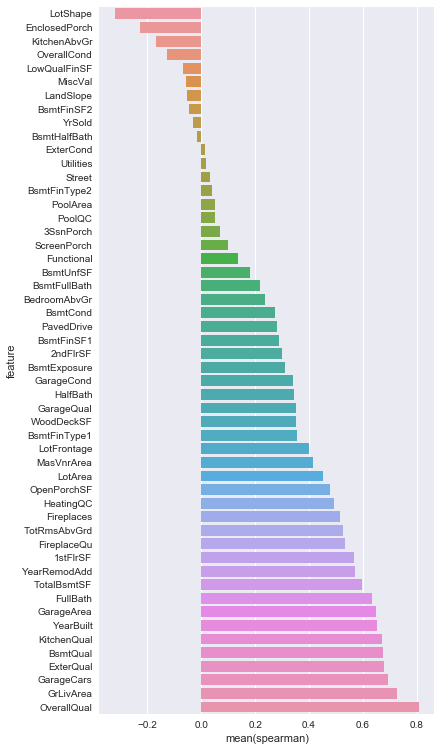

In [41]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    return spr
    
data_train = all_data[:train.shape[0]]
data_train = pd.concat([train.SalePrice,data_train[quantitative]],axis=1)
spr = spearman(data_train, quantitative)

In [42]:
#for i in spr.index:
#    if spr['spearman'][i]<0.01:
#        all_data.drop(spr['feature'][i], axis = 1, inplace = True)

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


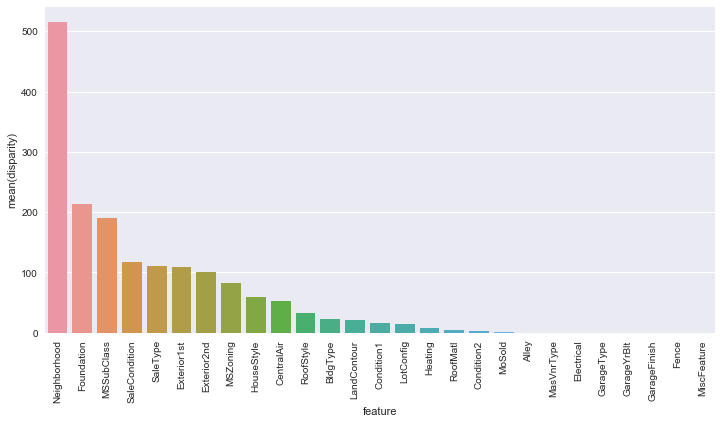

In [43]:
import scipy.stats as stats
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [44]:
for i,pval in enumerate(a['pval']):
    if pval!=pval:
        print(a['feature'][a.index[i]],pval)
        all_data.drop(a['feature'][a.index[i]], axis = 1, inplace = True)

Alley nan
MasVnrType nan
Electrical nan
GarageType nan
GarageYrBlt nan
GarageFinish nan
Fence nan
MiscFeature nan


In [45]:
qualitative = [f for f in all_data.columns if all_data.dtypes[f] == 'object']

# creation of new feature

In [46]:
def encode(frame, feature,out_data):
    ordering = pd.DataFrame()
    ordering['val'] = out_data[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).median()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        out_data.loc[out_data[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
data1 = all_data[:train.shape[0]]
train_data = pd.concat([data1,train.SalePrice],axis=1)
for q in qualitative:  
    encode(train_data, q,all_data)
    all_data.drop(q,axis=1,inplace=True)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSSubClass_E', 'MSZoning_E', 'LandContour_E', 'LotConfig_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'Foundation_E', 'Heating_E', 'CentralAir_E', 'MoSold_E', 'SaleType_E', 'SaleCondition_E']


In [47]:
# symétrisation des données numériques
from scipy.stats import skew

skewed_feats = all_data.loc[:, quantitative].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.5]
skewed_feats = skewed_feats.index
print(str(skewed_feats.shape[0]) + " skewed numerical features to log transform")
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

30 skewed numerical features to log transform


In [48]:
# 2* Combinations of existing features
# Overall quality of the house
all_data["OverallGrade"] = all_data["OverallQual"] * all_data["OverallCond"]
# Overall quality of the garage
all_data["GarageGrade"] = all_data["GarageQual"] * all_data["GarageCond"]
# Overall quality of the exterior
all_data["ExterGrade"] = all_data["ExterQual"] * all_data["ExterCond"]
# Overall kitchen score
all_data["KitchenScore"] = all_data["KitchenAbvGr"] * all_data["KitchenQual"]
# Overall fireplace score
all_data["FireplaceScore"] = all_data["Fireplaces"] * all_data["FireplaceQu"]
# Overall garage score
all_data["GarageScore"] = all_data["GarageArea"] * all_data["GarageQual"]
# Overall pool score
all_data["PoolScore"] = all_data["PoolArea"] * all_data["PoolQC"]
# Total number of bathrooms
all_data["TotalBath"] = all_data["BsmtFullBath"] + (0.5 * all_data["BsmtHalfBath"]) + \
all_data["FullBath"] + (0.5 * all_data["HalfBath"])
# Total SF for house (incl. basement)
all_data["AllSF"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
all_data["AllFlrsSF"] = all_data["1stFlrSF"] + all_data["2ndFlrSF"]
# Total SF for porch
all_data["AllPorchSF"] = all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + \
all_data["3SsnPorch"] + all_data["ScreenPorch"]
# Has masonry veneer or not
#all_data["HasMasVnr"] = all_data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
#                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
#all_data["BoughtOffPlan"] = all_data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0,
#                                                            "Family" : 0, "Normal" : 0, "Partial" : 1})

In [49]:
# Create new features
# 3* Polynomials on the top 10 existing features
all_data["OverallQual-s2"] = all_data["OverallQual"] ** 2
all_data["OverallQual-s3"] = all_data["OverallQual"] ** 3
all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["AllSF-2"] = all_data["AllSF"] ** 2
all_data["AllSF-3"] = all_data["AllSF"] ** 3
all_data["AllSF-Sq"] = np.sqrt(all_data["AllSF"])
all_data["AllFlrsSF-2"] = all_data["AllFlrsSF"] ** 2
all_data["AllFlrsSF-3"] = all_data["AllFlrsSF"] ** 3
all_data["AllFlrsSF-Sq"] = np.sqrt(all_data["AllFlrsSF"])
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["ExterQual-2"] = all_data["ExterQual"] ** 2
all_data["ExterQual-3"] = all_data["ExterQual"] ** 3
all_data["ExterQual-Sq"] = np.sqrt(all_data["ExterQual"])
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageCars-3"] = all_data["GarageCars"] ** 3
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotalBath-2"] = all_data["TotalBath"] ** 2
all_data["TotalBath-3"] = all_data["TotalBath"] ** 3
all_data["TotalBath-Sq"] = np.sqrt(all_data["TotalBath"])
all_data["KitchenQual-2"] = all_data["KitchenQual"] ** 2
all_data["KitchenQual-3"] = all_data["KitchenQual"] ** 3
all_data["KitchenQual-Sq"] = np.sqrt(all_data["KitchenQual"])
all_data["GarageScore-2"] = all_data["GarageScore"] ** 2
all_data["GarageScore-3"] = all_data["GarageScore"] ** 3
all_data["GarageScore-Sq"] = np.sqrt(all_data["GarageScore"])
all_data['YearBuilt-2'] = all_data["YearBuilt"] ** 2
all_data['YearRemodAdd-2'] = all_data["YearRemodAdd"] ** 2
all_data['TotalBsmtSF-2'] = all_data["TotalBsmtSF"] ** 2
all_data['2ndFlrSF-2'] = all_data["2ndFlrSF"] ** 2


In [50]:
all_data['HasBasement'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['Has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasMasVnr'] = all_data['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasWoodDeck'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasPorch'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['IsNew'] = all_data['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

In [51]:
all_data['Age']=all_data['YearBuilt']-all_data['YrSold']

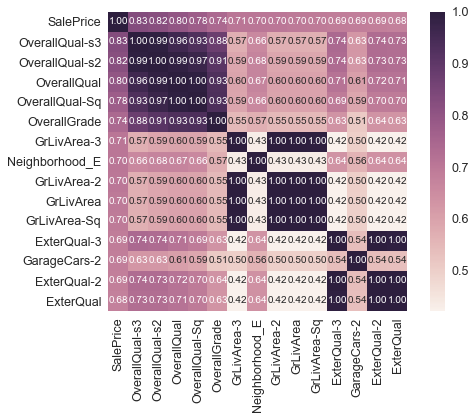

In [52]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
data1 = all_data[:train.shape[0]]
train_data = pd.concat([data1,train.SalePrice],axis=1)
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

,feature,spearman
3,LotShape,-0.321796
45,EnclosedPorch,-0.226477
32,KitchenAbvGr,-0.167856
7,OverallCond,-0.128401
25,LowQualFinSF,-0.067048
50,MiscVal,-0.055674
5,LandSlope,-0.053212
19,BsmtFinSF2,-0.045881
51,YrSold,-0.030734
28,BsmtHalfBath,-0.014762


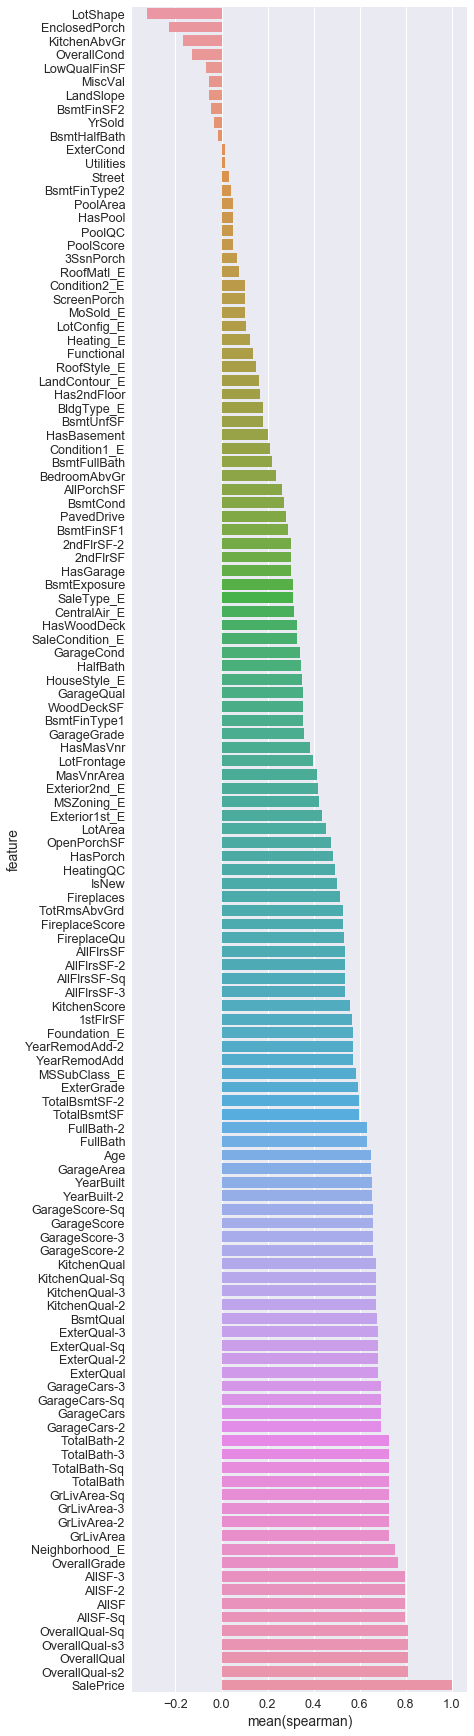

In [53]:
spearman(train_data, list(train_data.columns))

In [54]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import spectral_clustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

#model = TSNE(n_components=2, random_state=0, perplexity=50)
#tsne = model.fit_transform(all_data)

#std = StandardScaler()
#s = std.fit_transform(all_data)
#pca = PCA(n_components=20)
#pca.fit(s)
#pc = pca.transform(s)
#kmeans = KMeans(n_clusters=15)
#kmeans.fit(tsne)

#fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
#sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
#print(np.sum(pca.explained_variance_ratio_))


#std = StandardScaler()
#s = std.fit_transform(tsne)
#db = DBSCAN(eps=2.0, min_samples=1).fit(tsne)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
#labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#print('Estimated number of clusters: %d' % n_clusters_)
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(tsne, labels))
#fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': db.labels_})
#sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)

In [55]:
#label_train = labels[:train.shape[0]]
#cluster_price = np.zeros(all_data.shape[0])
#for c in set(label_train):
#    avg_price = np.mean(train[label_train == c]['SalePrice'].values)
#    std_price = np.std(train[label_train == c]['SalePrice'].values)
#    cluster_price[labels==c] = avg_price
#    print('mean SalePrice value :',avg_price,'with std',std_price,' for cluster ',c)
#    all_data['ClusterPrice']=pd.DataFrame({'ClusterPrice':np.log(cluster_price)})


In [56]:
for f in all_data.columns:
    if all_data[f].isnull().sum()>0:
        print(f)

In [57]:
#all_data = all_data.drop('RoofMatl_ClyTile', axis=1) # only one is not zero
#all_data = all_data.drop('Condition2_PosN', axis=1) # only two is not zero
#all_data = all_data.drop('MSSubClass_SC150', axis=1)
#all_data = all_data.drop('MSZoning_C (all)', axis=1)
# this features definitely cause overfitting

In [58]:
#all_data =pd.concat([all_data,pd.get_dummies(fr.cluster)],axis=1)

In [59]:
#from sklearn.preprocessing import StandardScaler
#stdSc = StandardScaler()
#all_data = stdSc.fit_transform(all_data)
from sklearn import preprocessing

all_data_scaled = preprocessing.MinMaxScaler().fit_transform(all_data)


In [60]:
#creating matrices for sklearn:
X_train = all_data_scaled[:train.shape[0]]
X_test = all_data_scaled[train.shape[0]:]
y = np.log(train.SalePrice)

In [61]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 3))
    return(rmse)

RMSE ridge : 0.113245386782
Ridge picked 123 features and eliminated the other 0 features


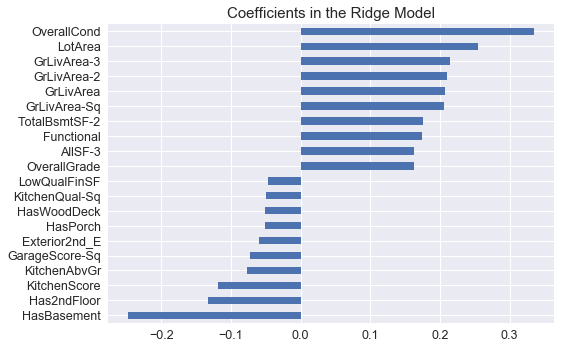

In [62]:
from sklearn.linear_model import Ridge,RidgeCV
#model_ridge = Ridge(alpha=10.0)
model_ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
print("RMSE ridge :",rmse_cv(model_ridge).mean())
model_ridge.fit(X_train,y)
y_train_ridge= model_ridge.predict(X_train)
# Plot important coefficients
coefs = pd.Series(model_ridge.coef_, index = all_data.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [63]:
model_ridge.fit(X_train, y)
y_pred_ridge = model_ridge.predict(X_test)
test = pd.read_csv("./test.csv")
output = pd.DataFrame({'SalePrice':np.exp(y_pred_ridge)})# pour les model normaux
result_data = pd.concat([test.Id,output],axis=1)
result_data.set_index('Id',inplace=True)
result_data.to_csv('sample_submission_ridge.csv')

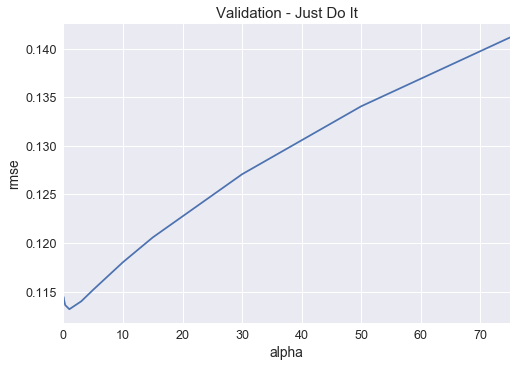

In [64]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [65]:
from sklearn.ensemble import RandomForestRegressor
RFregr = RandomForestRegressor(random_state=0,n_estimators=300)
rmse_cv(RFregr).mean()

0.13503853727318033

In [66]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
rmse_cv(model_xgb).mean()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.11977496886046828

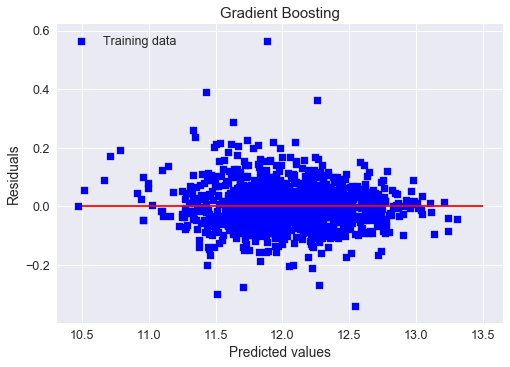

In [67]:
model_xgb.fit(X_train, y)
y_train_xgb = model_xgb.predict(X_train)
# Plot residuals
plt.scatter(y_train_xgb, y_train_xgb - y, c = "blue", marker = "s", label = "Training data")
plt.title("Gradient Boosting")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
y_pred_xgb = model_xgb.predict(X_test)

In [68]:
test = pd.read_csv("./test.csv")

In [69]:
output = pd.DataFrame({'SalePrice':np.exp(y_pred_xgb)})# pour les model normaux

In [70]:
result_data = pd.concat([test.Id,output],axis=1)
result_data.set_index('Id',inplace=True)
result_data.to_csv('sample_submission_xgb.csv')

RMSE lasso : 0.114728138313


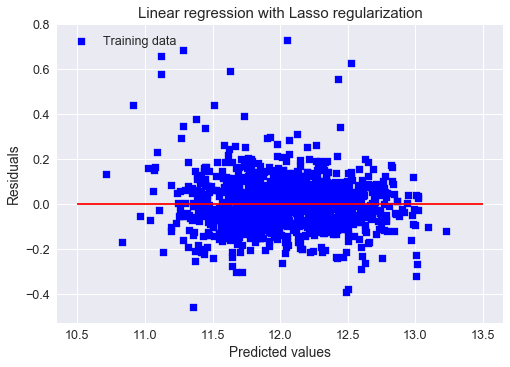

Lasso picked 74 features and eliminated the other 49 features


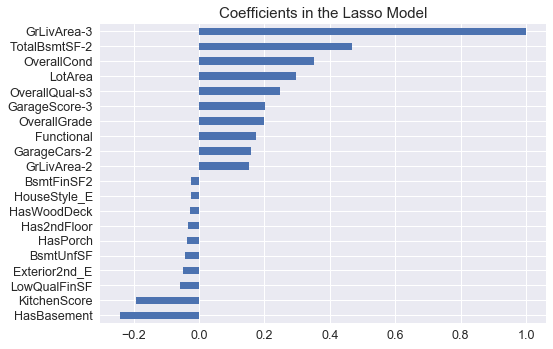

In [71]:
from sklearn.linear_model import LassoCV
#Linear Regression with Lasso regularization (L1 penalty)
# 3* Lasso
#lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
#                          0.3, 0.6, 1], 
#                max_iter = 50000, cv = 10)
#lasso.fit(X_train, y)
#alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
#lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
#                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
#                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
#                          alpha * 1.4], 
#                max_iter = 50000, cv = 10)
#lasso.fit(X_train, y)
model_lasso = LassoCV(alphas = [1e-4, 5e-4, 1e-3, 5e-3],max_iter=10000)
print("RMSE lasso :",rmse_cv(model_lasso).mean())
model_lasso.fit(X_train,y)
y_train_lasso = model_lasso.predict(X_train)
# Plot residuals
plt.scatter(y_train_lasso, y_train_lasso - y, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(model_lasso.coef_, index = all_data.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [72]:
rmse_cv(model_lasso).mean()

0.11472813831263666

In [73]:
model_lasso.fit(X_train, y)
y_pred_lasso = model_lasso.predict(X_test)
test = pd.read_csv("./test.csv")
output = pd.DataFrame({'SalePrice':np.exp(y_pred_lasso)})# pour les model normaux
result_data = pd.concat([test.Id,output],axis=1)
result_data.set_index('Id',inplace=True)
result_data.to_csv('sample_submission_lasso.csv')

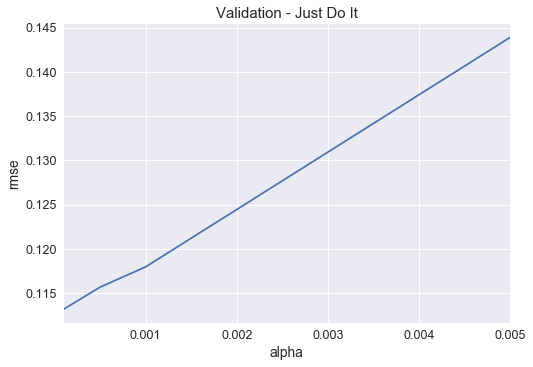

In [74]:
from sklearn.linear_model import Lasso
alphas = [1e-4, 5e-4, 1e-3, 5e-3]
cv_lasso = [rmse_cv(Lasso(alpha = alpha,max_iter=10000)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [75]:
from sklearn.linear_model import RANSACRegressor
model_ransac = RANSACRegressor(model_lasso,max_trials=200,min_samples=100,residual_threshold=5.0,random_state=0)
rmse_cv(model_ransac).mean()

0.11472813831263666

Best l1_ratio : 0.1
Best alpha : 0.0003
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.115
Best alpha : 0.0003
Now try again for more precision on alpha, with l1_ratio fixed at 0.115 and alpha centered around 0.0003
Best l1_ratio : 0.115
Best alpha : 0.00039


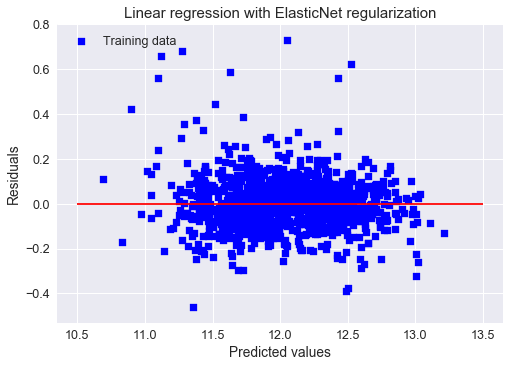

ElasticNet picked 100 features and eliminated the other 23 features


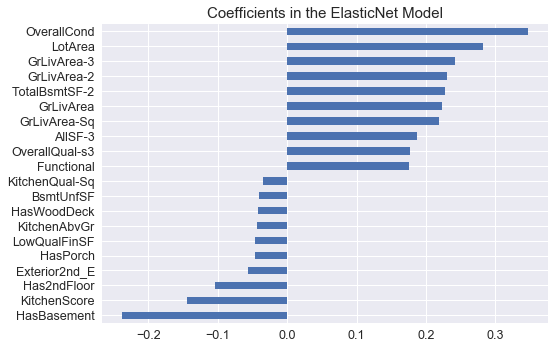

In [76]:
from sklearn.linear_model import ElasticNetCV

#Linear Regression with ElasticNet regularization (L1 and L2 penalty)
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
model_ela = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
model_ela.fit(X_train, y)
if (model_ela.l1_ratio_ > 1):
    model_ela.l1_ratio_ = 1    
alpha = model_ela.alpha_
ratio = model_ela.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

y_train_ela = model_ela.predict(X_train)
y_pred_ela = model_ela.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(model_ela.coef_, index = all_data.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

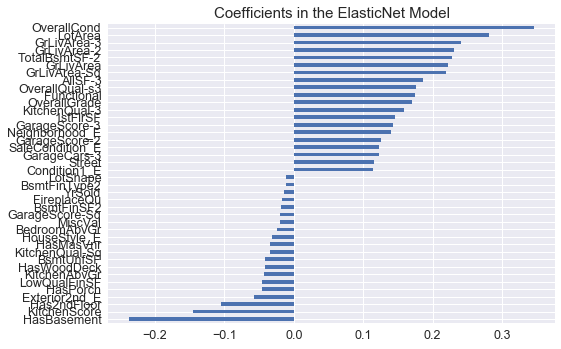

In [77]:
imp_coefs = pd.concat([coefs.sort_values().head(20),
                     coefs.sort_values().tail(20)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [78]:
rmse_cv(model_ela).mean()

0.11309092487560024

In [79]:
model_ela.fit(X_train, y)
y_pred_ela = model_ela.predict(X_test)
test = pd.read_csv("./test.csv")
output = pd.DataFrame({'SalePrice':np.exp(y_pred_ela)})# pour les model normaux
result_data = pd.concat([test.Id,output],axis=1)
result_data.set_index('Id',inplace=True)
result_data.to_csv('sample_submission_elasticNet.csv')

In [80]:
#from sklearn.feature_selection import RFE
# create the RFE model and select 200 attributes
#model_rfe = RFE(model_ela, 100)
#model_rfe.fit(X_train, y)
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

In [81]:
#rmse_cv(model_rfe).mean()

In [82]:
#print(model_rfe.ranking_)

In [83]:
#model_rfe.fit(X_train, y)
#y_pred_rfe = model_rfe.predict(X_test)
#test = pd.read_csv("./test.csv")
#output = pd.DataFrame({'SalePrice':np.exp(y_pred_rfe)})# pour les model normaux
#result_data = pd.concat([test.Id,output],axis=1)
#result_data.set_index('Id',inplace=True)
#result_data.to_csv('sample_submission_RFE.csv')

In [84]:
# regression with Keras

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [85]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(20, input_dim=all_data.shape[1], kernel_initializer='normal', activation='relu'))
#    model.add(Dense(10, input_dim=all_data.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
#modelKeras = KerasRegressor(build_fn=baseline_model, epochs=300, batch_size=5, verbose=0)

In [86]:
#rmse_cv(modelKeras).mean()

In [87]:
#modelKeras.fit(X_train, y)
#y_pred = modelKeras.predict(X_test)

In [88]:
#test = pd.read_csv("./test.csv")

In [89]:
#output = pd.DataFrame({'SalePrice':np.exp(y_pred)})

In [90]:
#result_data = pd.concat([test.Id,output],axis=1)

In [91]:
#result_data.set_index('Id',inplace=True)

In [92]:
#result_data.to_csv('sample_submission.csv')

# Mixing models

In [93]:
import sklearn
sklearn.metrics.pairwise.cosine_similarity(y-y_train_xgb,y-y_train_lasso)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.82288842]])

In [94]:
y_train_xgb

array([ 12.22951031,  12.10566044,  12.26366806, ...,  12.46139336,
        11.87884808,  11.90915775], dtype=float32)

In [95]:
y_train_ridge

array([ 12.24220826,  12.17128311,  12.30566149, ...,  12.41381884,
        11.88056453,  11.9023833 ])

In [96]:
y_train_lasso

array([ 12.23906374,  12.17018759,  12.31097983, ...,  12.41355228,
        11.87146398,  11.89207492])

In [97]:
y_train_ela

array([ 12.24054393,  12.17012554,  12.30956255, ...,  12.41260348,
        11.87587033,  11.89855324])

In [98]:
bigY = np.matrix([y_train_xgb,y_train_ela])

In [99]:
invY = np.linalg.inv(np.dot(bigY,bigY.transpose()))

In [100]:
rhs = np.array(np.dot(bigY,y))

In [101]:
sol = np.dot(invY,rhs.transpose())

In [102]:
np.sum(sol)

1.0000013185563148

In [103]:
y_train_comb = np.dot(bigY.transpose(),sol)

In [104]:
y_train_comb = np.array(y_train_comb).ravel()

In [105]:
np.sqrt(np.mean((y_train_lasso-y)**2))

0.10426373853904182

In [106]:
np.sqrt(np.mean((y_train_comb-y)**2))

0.065233425535340714

In [107]:
bigYpred = np.matrix([y_pred_xgb,y_pred_ela])

In [108]:
y_pred_comb = np.dot(bigYpred.transpose(),sol)

In [109]:
y_pred_comb = 0.2*y_pred_xgb+0.8*y_pred_ela

In [110]:
y_pred_comb

array([ 11.68062685,  11.96114694,  12.09139855, ...,  12.01690494,
        11.69987629,  12.29633657])

In [111]:
test = pd.read_csv("./test.csv")
output = pd.DataFrame({'SalePrice':np.exp(y_pred_comb)})# pour les model normaux
result_data = pd.concat([test.Id,output],axis=1)
result_data.set_index('Id',inplace=True)
result_data.to_csv('sample_submission_comb.csv')

In [112]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()

X_train = pd.DataFrame({'XGB':y_train_xgb,'Ridge':y_train_ridge,'Lasso':y_train_lasso,'ela':y_train_ela})
X_train = stdSc.fit_transform(X_train)
X_test = pd.DataFrame({'XGB':y_pred_xgb,'Ridge':y_pred_ridge,'Lasso':y_pred_lasso,'ela':y_pred_ela})
X_test = stdSc.transform(X_test)

In [113]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
rmse_cv(model_reg).mean()

0.065232599359993579

In [114]:
model_reg.fit(X_train, y)
y_pred_reg = model_reg.predict(X_test)
test = pd.read_csv("./test.csv")
output = pd.DataFrame({'SalePrice':np.exp(y_pred_reg)})# pour les model normaux
result_data = pd.concat([test.Id,output],axis=1)
result_data.set_index('Id',inplace=True)
result_data.to_csv('sample_submission_reg.csv')

In [115]:
model_reg.coef_

array([-0.13612512,  0.20946055,  0.5022243 , -0.19057721])

In [116]:
y_pred_reg

array([ 11.74134862,  11.96232237,  12.16379889, ...,  12.00369023,
        11.65830863,  12.21835427])